## Analysis of Wholesale Customers Dataset


A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

This report will show all the analysis help the business to solve its problem.

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
df=pd.read_csv("Wholesale+Customers+Data.csv")

In [4]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [5]:
df.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125
439,440,Hotel,Other,2787,1698,2510,65,477,52


In [6]:
print('The number of rows are {} and the columns are {}'.format(df.shape[0],df.shape[1]))

The number of rows are 440 and the columns are 9


In [7]:
print('The total number of elements of the dataset are: ')
df.size

The total number of elements of the dataset are: 


3960

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [9]:
df.isnull()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
435,False,False,False,False,False,False,False,False,False
436,False,False,False,False,False,False,False,False,False
437,False,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False,False


In [10]:
print(" The missing values are: \n ", df.isnull().head(1))

 The missing values are: 
     Buyer/Spender  Channel  Region  Fresh   Milk  Grocery  Frozen  \
0          False    False   False  False  False    False   False   

   Detergents_Paper  Delicatessen  
0             False         False  


In [11]:
df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [12]:
correlation = df.corr()
correlation

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Buyer/Spender,1.000000,-0.061151,-0.162290,-0.140509,0.053802,-0.134365,-0.101845
Fresh,-0.061151,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,-0.162290,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.140509,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.053802,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.134365,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,-0.101845,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


<AxesSubplot:>

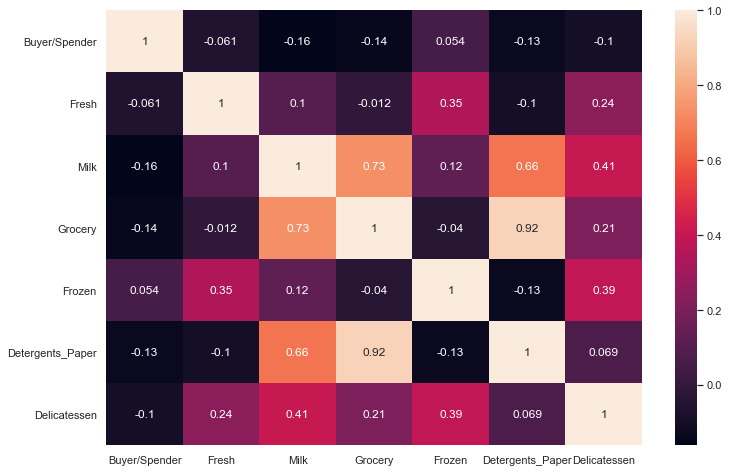

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot = True)

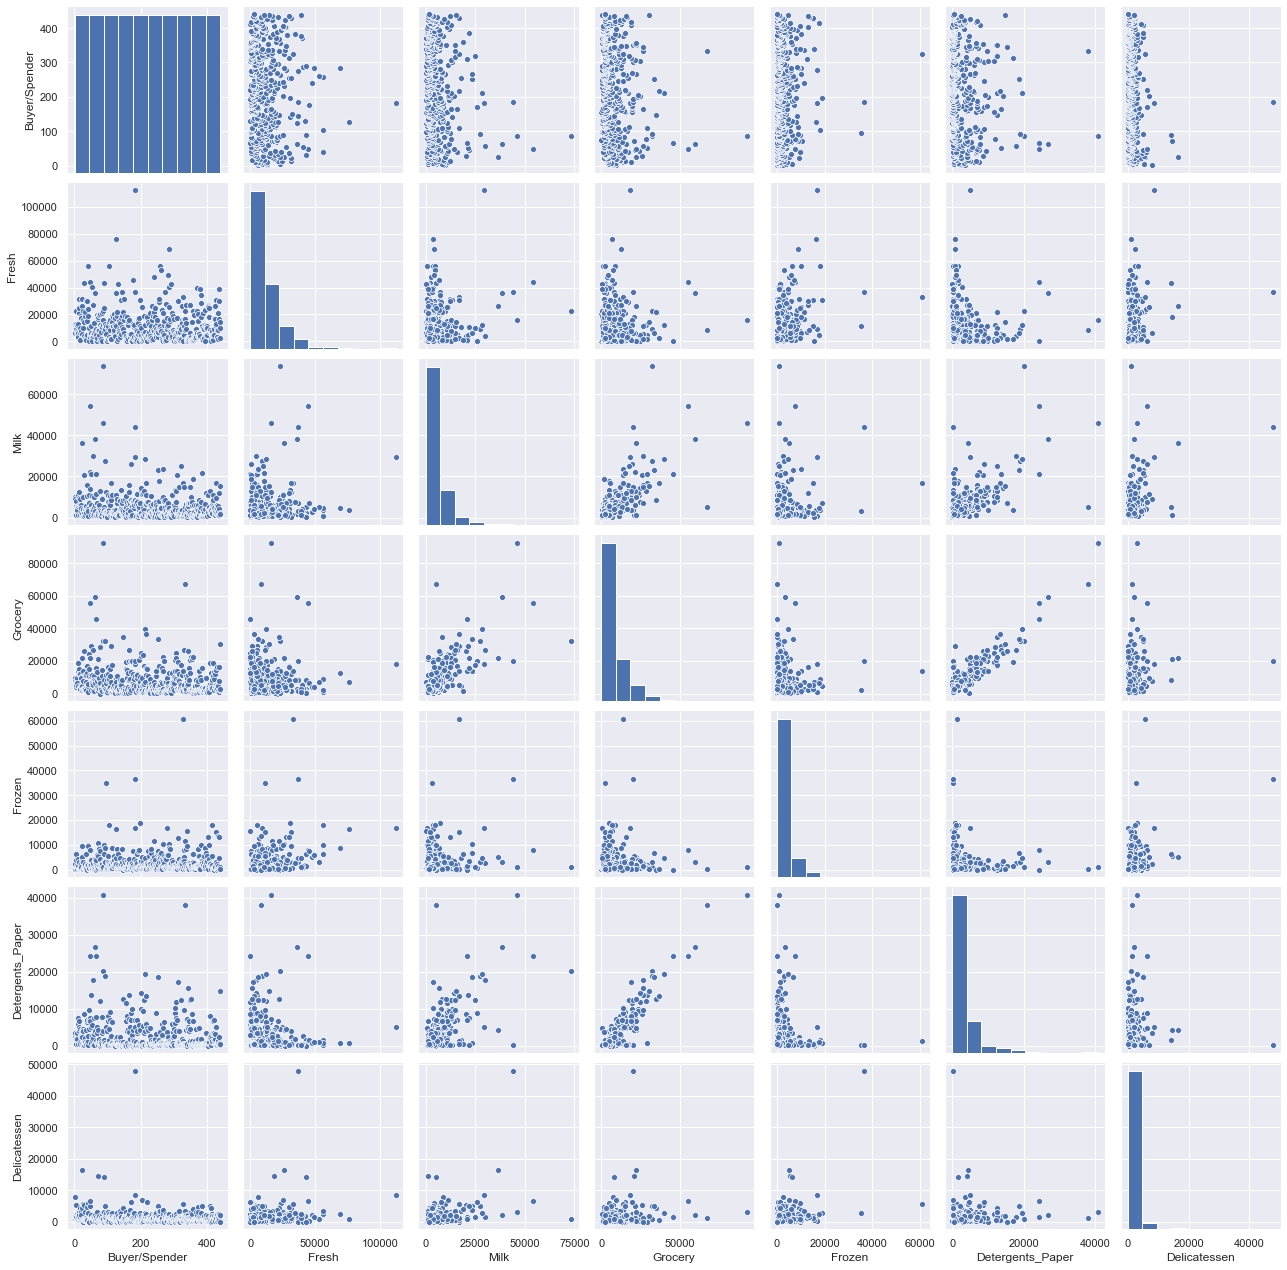

In [14]:
sns.pairplot(df[['Buyer/Spender','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']])

# Q1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [15]:
df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [16]:
df.describe(include='all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


In [17]:
df['Spends'] =df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen']
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spends
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [18]:
dfregion = df.groupby('Region')['Spends'].sum()
print(dfregion)
dfchannel = df.groupby('Channel')['Spends'].sum()
print(dfchannel)

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Spends, dtype: int64
Channel
Hotel     7999569
Retail    6619931
Name: Spends, dtype: int64


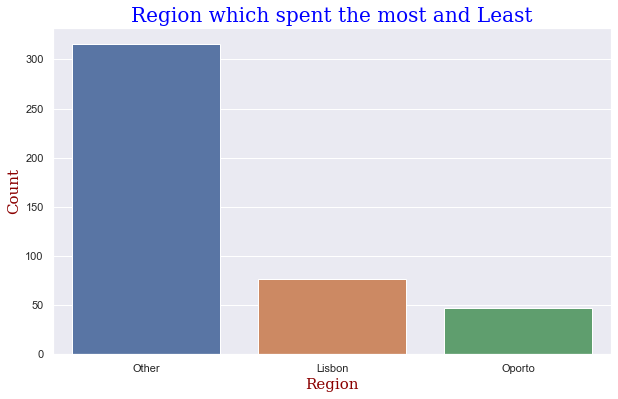

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [19]:
plt.figure(figsize = (10,6))
sns.countplot(df['Region'])
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("Region which spent the most and Least",fontdict = font1)
plt.xlabel("Region",fontdict = font2)
plt.ylabel("Count",fontdict = font2)
plt.xticks(rotation=0)
plt.show()
df['Region'].value_counts()

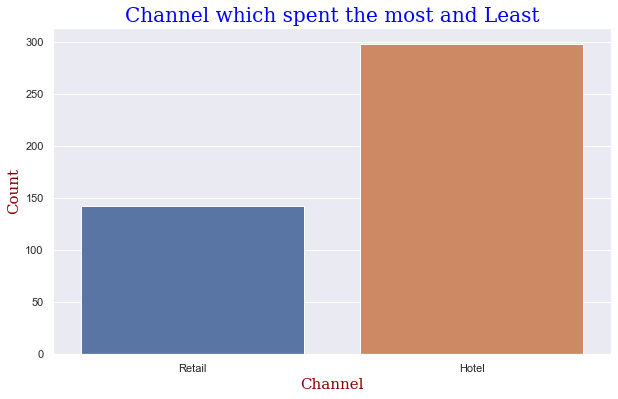

Hotel     298
Retail    142
Name: Channel, dtype: int64

In [20]:
plt.figure(figsize = (10,6))
sns.countplot(df['Channel'])
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("Channel which spent the most and Least",fontdict = font1)
plt.xlabel("Channel",fontdict = font2)
plt.ylabel("Count",fontdict = font2)
plt.xticks(rotation=0)
plt.show()
df['Channel'].value_counts()

# Q1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

Text(0.5, 1.0, 'Varieties_Fresh')

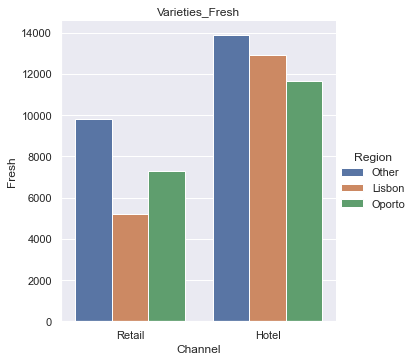

In [21]:
sns.catplot(x="Channel", y="Fresh", hue ="Region", kind="bar", ci=None, data=df)
plt.title('Varieties_Fresh')

Text(0.5, 1.0, 'Varieties_Fresh')

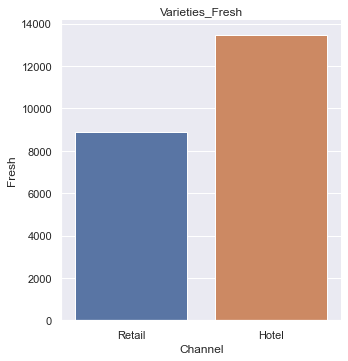

In [22]:
sns.catplot(x="Channel",y="Fresh",kind="bar",ci=None,data=df)
plt.title('Varieties_Fresh')

Text(0.5, 1.0, 'Varieties_Fresh')

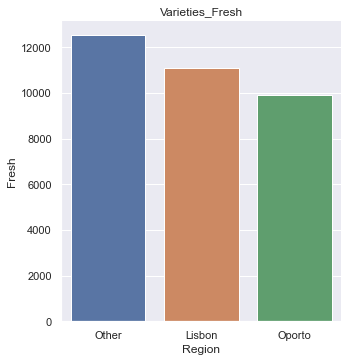

In [23]:
sns.catplot(x="Region",y="Fresh",kind="bar",ci=None,data=df)
plt.title('Varieties_Fresh')

Text(0.5, 1.0, 'Varieties_Milk')

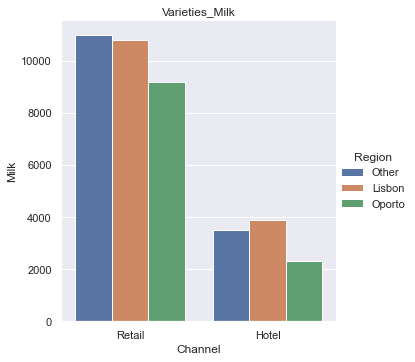

In [24]:
sns.catplot(x="Channel", y="Milk", hue ="Region", kind="bar", ci=None, data=df)
plt.title('Varieties_Milk')

Text(0.5, 1.0, 'Varieties_Milk')

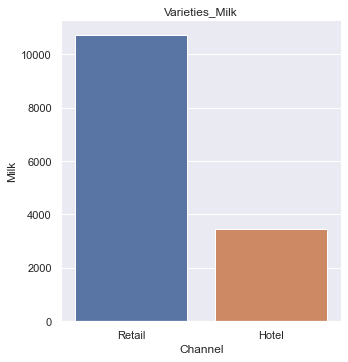

In [25]:
sns.catplot(x="Channel",y="Milk",kind="bar",ci=None, data=df)
plt.title('Varieties_Milk')

Text(0.5, 1.0, 'Varieties_Milk')

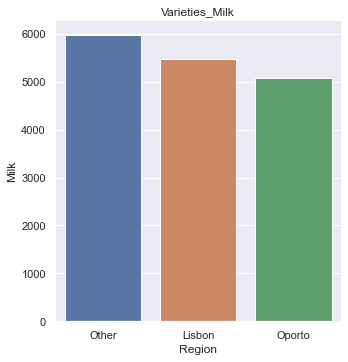

In [26]:
sns.catplot(x="Region",y="Milk",kind="bar",ci=None, data=df)
plt.title('Varieties_Milk')

Text(0.5, 1.0, 'Varieties_Grocery')

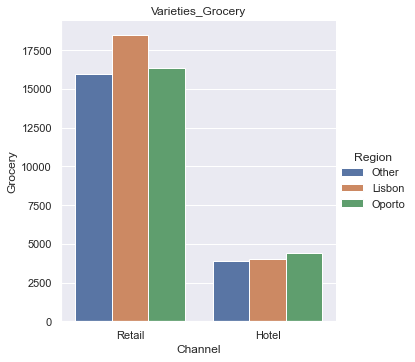

In [27]:
sns.catplot(x="Channel", y="Grocery", hue ="Region", kind="bar", ci=None, data=df)
plt.title('Varieties_Grocery')

Text(0.5, 1.0, 'Varieties_Grocery')

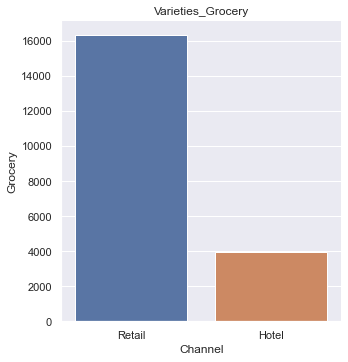

In [28]:
sns.catplot(x="Channel",y="Grocery",kind="bar",ci=None,data=df)
plt.title('Varieties_Grocery')

Text(0.5, 1.0, 'Varieties_Grocery')

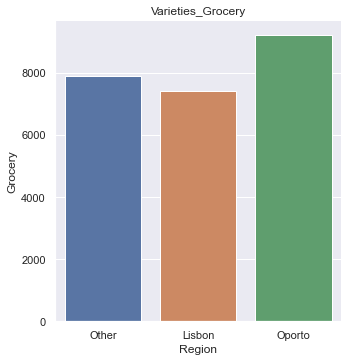

In [29]:
sns.catplot(x="Region",y="Grocery",kind="bar",ci=None,data=df)
plt.title('Varieties_Grocery')

Text(0.5, 1.0, 'Varieties_Frozen')

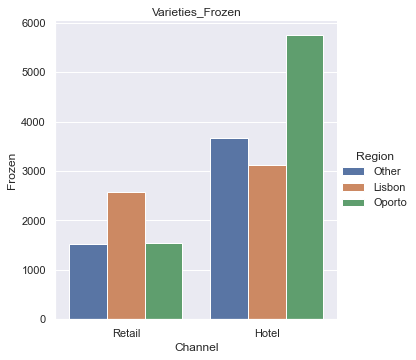

In [30]:
sns.catplot(x="Channel",y="Frozen",hue ="Region",kind="bar",ci=None, data=df)
plt.title('Varieties_Frozen')

Text(0.5, 1.0, 'Varieties_Frozen')

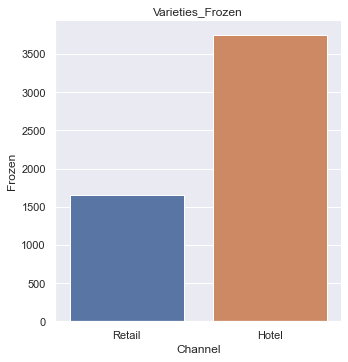

In [31]:
sns.catplot(x="Channel",y="Frozen",kind="bar",ci=None, data=df)
plt.title('Varieties_Frozen')

Text(0.5, 1.0, 'Varieties_Frozen')

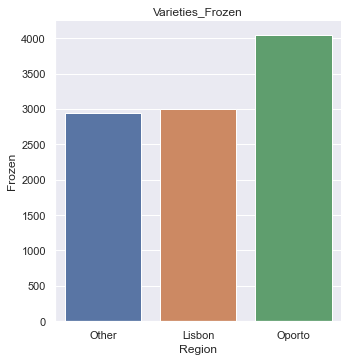

In [32]:
sns.catplot(x="Region",y="Frozen",kind="bar",ci=None, data=df)
plt.title('Varieties_Frozen')

Text(0.5, 1.0, 'Varieties_Detergents_Paper')

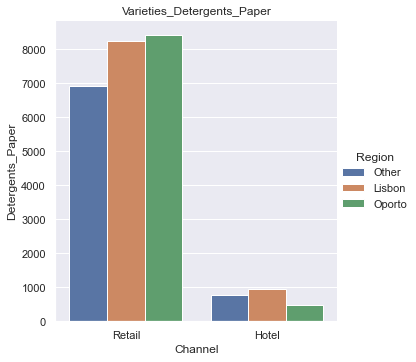

In [33]:
sns.catplot(x="Channel",y="Detergents_Paper",hue ="Region",kind="bar",ci=None, data=df)
plt.title('Varieties_Detergents_Paper')

Text(0.5, 1.0, 'Varieties_Detergents_Paper')

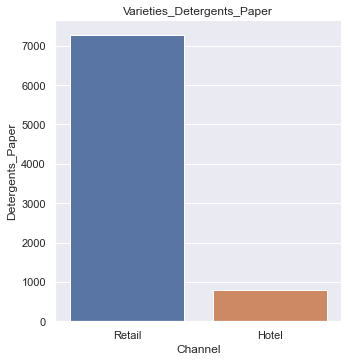

In [34]:
sns.catplot(x="Channel",y="Detergents_Paper",kind="bar",ci=None, data=df)
plt.title('Varieties_Detergents_Paper')

Text(0.5, 1.0, 'Varieties_Detergents_Paper')

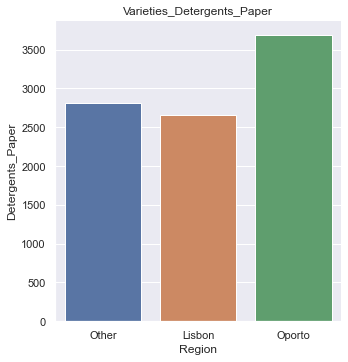

In [35]:
sns.catplot(x="Region",y="Detergents_Paper",kind="bar",ci=None, data=df)
plt.title('Varieties_Detergents_Paper')

Text(0.5, 1.0, 'Varieties_Delicatessen')

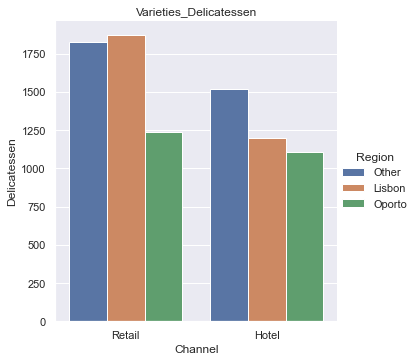

In [36]:
sns.catplot(x="Channel",y="Delicatessen",hue ="Region",kind="bar",ci=None, data=df)
plt.title('Varieties_Delicatessen')

Text(0.5, 1.0, 'Varieties_Delicatessen')

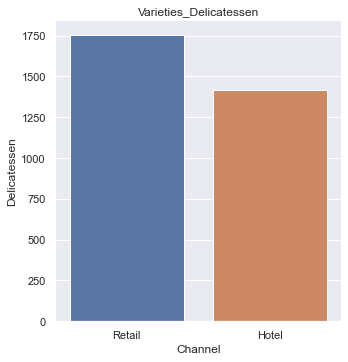

In [37]:
sns.catplot(x="Channel",y="Delicatessen",kind="bar",ci=None, data=df)
plt.title('Varieties_Delicatessen')

Text(0.5, 1.0, 'Varieties_Delicatessen')

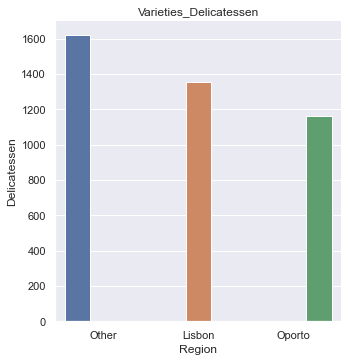

In [38]:
sns.catplot(x="Region",y="Delicatessen",hue ="Region",kind="bar",ci=None, data=df)
plt.title('Varieties_Delicatessen')

# Q1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [39]:
df.drop(['Spends'], axis=1, inplace=True)

In [40]:
#Standard deviation
std_items = df.std() 
std_items

Buyer/Spender         127.161315
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

In [41]:
#coefficient of variation
cov_fresh = np.std(df['Fresh']) / np.mean(df['Fresh'])
cov_fresh

1.0527196084948245

In [42]:
cov_milk = np.std(df['Milk']) / np.mean(df['Milk'])
cov_milk

1.2718508307424503

In [43]:
cov_grocery = np.std(df['Grocery']) / np.mean(df['Grocery'])
cov_grocery

1.193815447749267

In [44]:
cov_frozen = np.std(df['Frozen']) / np.mean(df['Frozen'])
cov_frozen

1.5785355298607762

In [45]:
cov_detergents_paper = np.std(df['Detergents_Paper']) / np.mean(df['Detergents_Paper'])
cov_detergents_paper

1.6527657881041729

In [46]:
cov_delicatessen = np.std(df['Delicatessen']) / np.mean(df['Delicatessen'])
cov_delicatessen

1.8473041039189306

In [47]:
var_df = df.var()
var_df

Buyer/Spender       1.617000e+04
Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicatessen        7.952997e+06
dtype: float64

In [48]:
df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# Q1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

<AxesSubplot:>

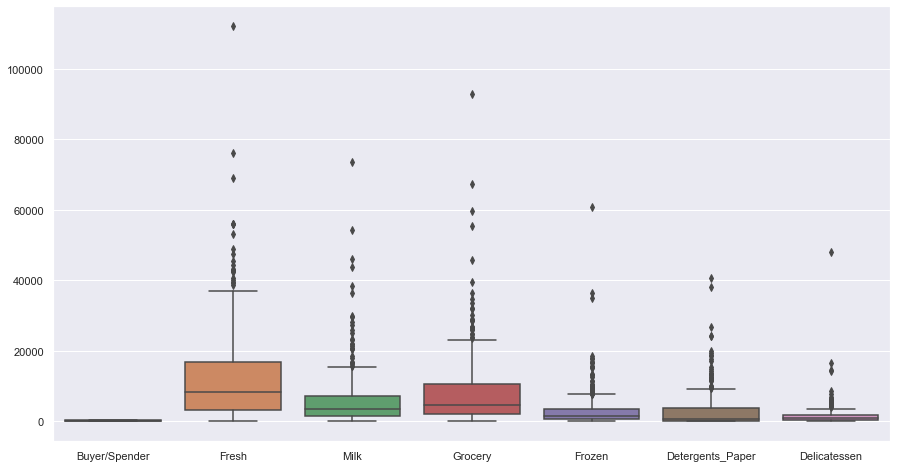

In [49]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)

# The End!!!

# ---------------------------------------------------------------------------------------------------------------

# Analysis of Student News Service at Clear Mountain State University (CMSU) 


The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set)

This report will show all the analysis help the business to solve its problem.

In [51]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from warnings import filterwarnings
filterwarnings("ignore")

In [52]:
dff=pd.read_csv("Survey-1.csv")

In [53]:
dff.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [54]:
dff.tail()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50
61,62,Female,23,Senior,Economics/Finance,No,3.2,Part-Time,70.0,2,3,250,Laptop,0


In [122]:
print('The number of rows are {} and the columns are {}'.format(dff.shape[0],dff.shape[1]))

The number of rows are 62 and the columns are 14


In [56]:
print('The total number of elements of the dataset are: ')
dff.size

The total number of elements of the dataset are: 


868

In [57]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [58]:
dff.isnull()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,False,False,False,False,False,False,False,False,False,False,False,False,False,False
58,False,False,False,False,False,False,False,False,False,False,False,False,False,False
59,False,False,False,False,False,False,False,False,False,False,False,False,False,False
60,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [59]:
print(" The missing values are: \n ", dff.isnull().head(1))

 The missing values are: 
        ID  Gender    Age  Class  Major  Grad Intention    GPA  Employment  \
0  False   False  False  False  False           False  False       False   

   Salary  Social Networking  Satisfaction  Spending  Computer  Text Messages  
0   False              False         False     False     False          False  


In [60]:
dff.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


In [61]:
correlation = dff.corr()
correlation

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
ID,1.000000,-0.075545,0.102328,-0.051484,-0.118383,-0.039676,-0.046230,0.138066
Age,-0.075545,1.000000,0.029370,-0.015536,0.011815,-0.046572,0.032968,-0.227753
GPA,0.102328,0.029370,1.000000,-0.308643,-0.197002,0.038097,-0.343403,0.042195
Salary,-0.051484,-0.015536,-0.308643,1.000000,0.017601,-0.197013,0.003402,-0.073640
Social Networking,-0.118383,0.011815,-0.197002,0.017601,1.000000,0.020125,0.073088,0.020940
Satisfaction,-0.039676,-0.046572,0.038097,-0.197013,0.020125,1.000000,0.090500,0.177548
Spending,-0.046230,0.032968,-0.343403,0.003402,0.073088,0.090500,1.000000,0.028489
Text Messages,0.138066,-0.227753,0.042195,-0.073640,0.020940,0.177548,0.028489,1.000000


<AxesSubplot:>

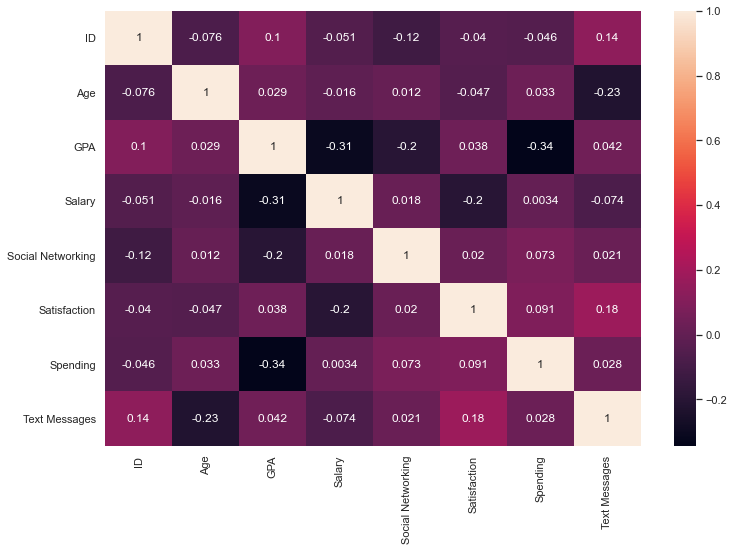

In [62]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot = True)

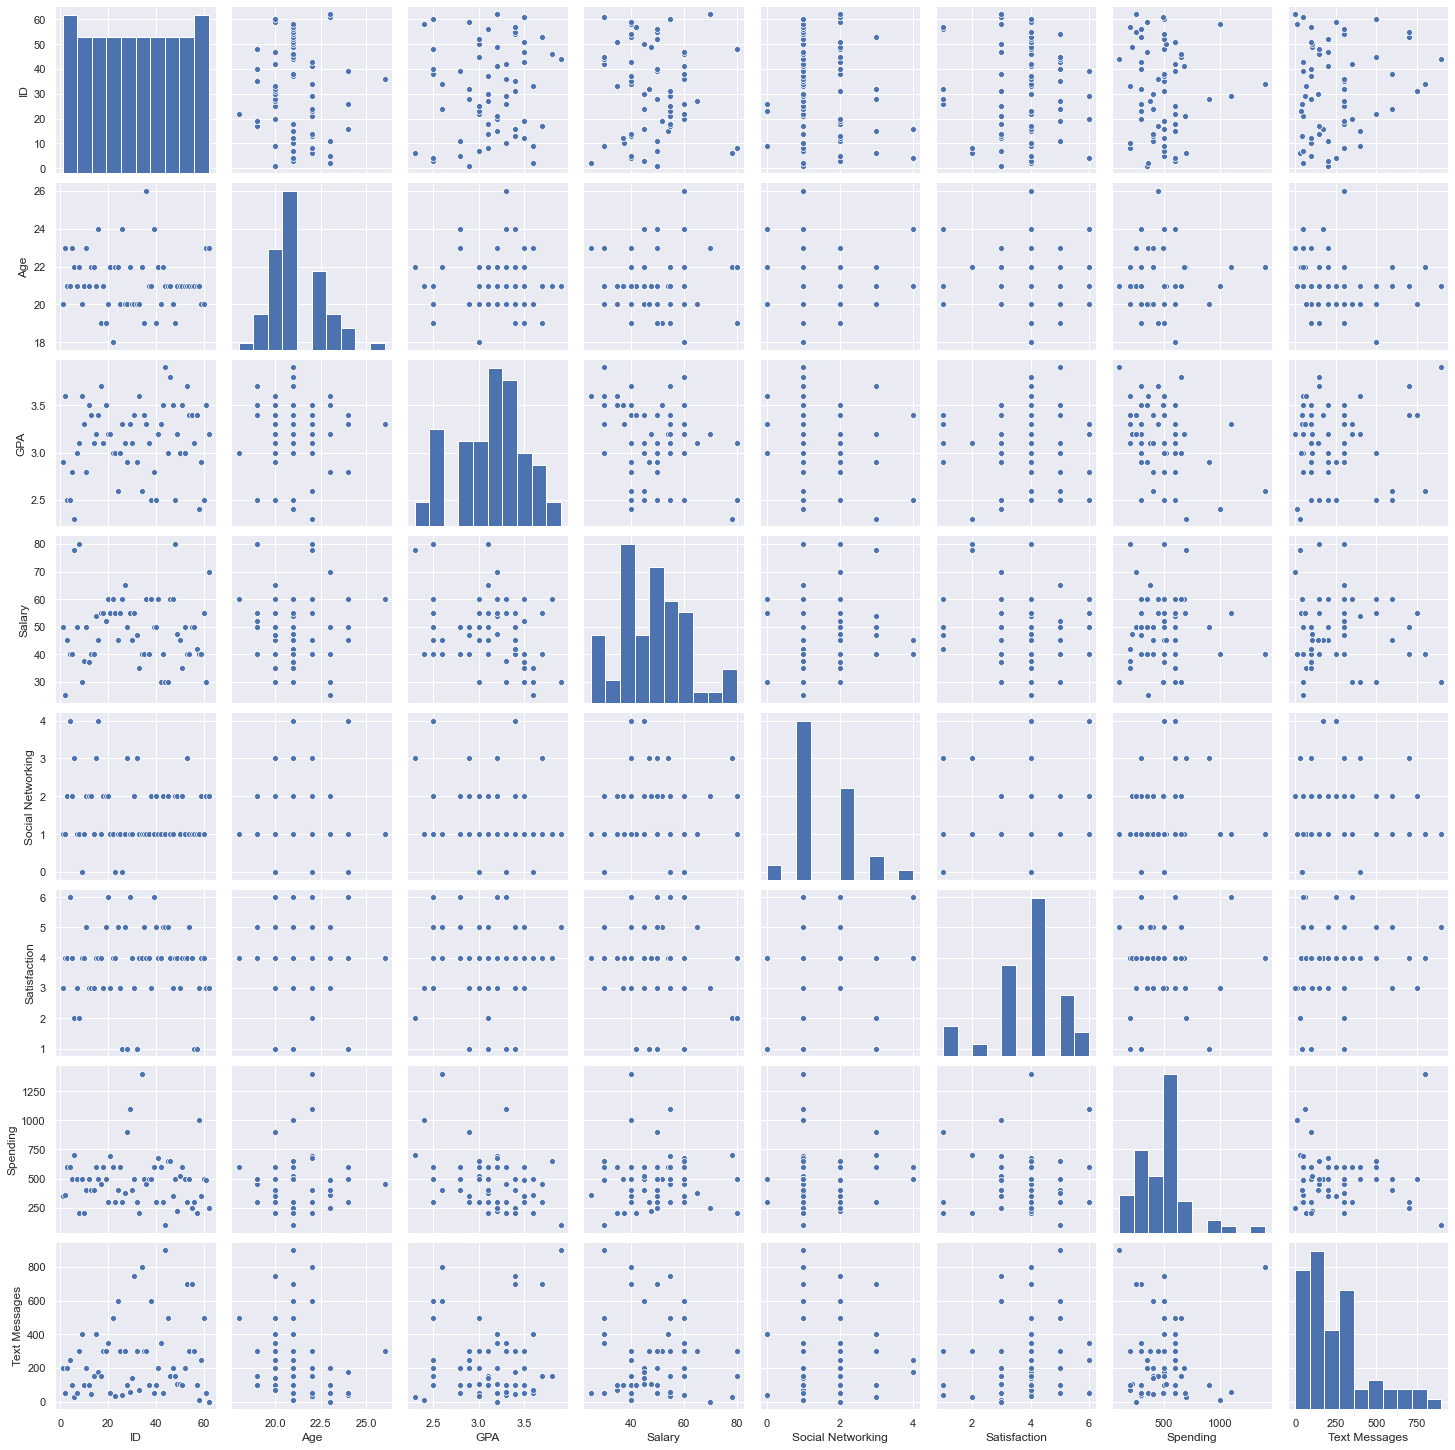

In [63]:
sns.pairplot(dff[['ID','Age','GPA','Salary','Social Networking','Satisfaction','Spending','Text Messages']])

# Q2.1. For this data, construct the following contingency tables (Keep Gender as row variable)?¶

# Q2.1.1. Gender and Major

In [64]:
pd.crosstab(dff['Gender'],dff['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


# Q2.1.2. Gender and Grad Intention

In [65]:
pd.crosstab(dff['Gender'],dff['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


# Q2.1.3. Gender and Employment

In [67]:
pd.crosstab(dff['Gender'],dff['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


# Q 2.1.4. Gender and Computer

In [69]:
pd.crosstab(dff['Gender'],dff['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


# Q2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [71]:
pd.crosstab([dff.Major, dff.Employment], dff.Gender)

Gender                             Female  Male
Major                  Employment              
Accounting             Full-Time        0     1
                       Part-Time        3     2
                       Unemployed       0     1
CIS                    Full-Time        0     1
                       Part-Time        3     0
Economics/Finance      Full-Time        1     1
                       Part-Time        5     3
                       Unemployed       1     0
International Business Part-Time        4     2
Management             Full-Time        0     1
                       Part-Time        1     5
                       Unemployed       3     0
Other                  Full-Time        2     0
                       Part-Time        1     3
                       Unemployed       0     1
Retailing/Marketing    Full-Time        0     1
                       Part-Time        7     3
                       Unemployed       2     1
Undecided              Full-Time        0     2
                       Part-Time        0     1

In [72]:
dff['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [73]:
print('Probability that a randomly selected CMSU student will be male:',29/len(dff['Gender']))

Probability that a randomly selected CMSU student will be male: 0.46774193548387094


Q2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [74]:
print('Probability that a randomly selected CMSU student will be female:',33/len(dff['Gender']))

Probability that a randomly selected CMSU student will be female: 0.532258064516129


# Q2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

Q2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [75]:
dff['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [77]:
pd.crosstab(dff['Gender'],dff['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


P (Major | Male) = P (Major ∩ Male)/ P(Male)

P (Major | Female) = P (Major ∩ Female)/ P(Female)

In [78]:
print('Among MALE candidates:')
print('Probability of Accounting:',4/29)
print('Probability of having a CIS:',1/29)
print('Probability of being a Economics/Finance:',4/29)
print('Probability of being International Business:',2/29)
print('Probability of being a Management:',6/29)
print('Probability of being Other:',4/29)
print('Probability of being Retailing/Marketing:',5/29)
print('Probability of being a Undecided:',3/29)

Among MALE candidates:
Probability of Accounting: 0.13793103448275862
Probability of having a CIS: 0.034482758620689655
Probability of being a Economics/Finance: 0.13793103448275862
Probability of being International Business: 0.06896551724137931
Probability of being a Management: 0.20689655172413793
Probability of being Other: 0.13793103448275862
Probability of being Retailing/Marketing: 0.1724137931034483
Probability of being a Undecided: 0.10344827586206896


Q2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [79]:
print('Among FEMALE candidates:')
print('Probability of Accounting:',3/33)
print('Probability of having a CIS:',3/33)
print('Probability of being a Economics/Finance:',7/33)
print('Probability of being International Business:',4/33)
print('Probability of being a Management:',4/33)
print('Probability of being Other:',3/33)
print('Probability of being Retailing/Marketing:',9/33)
print('Probability of being a Undecided:',0/33)

Among FEMALE candidates:
Probability of Accounting: 0.09090909090909091
Probability of having a CIS: 0.09090909090909091
Probability of being a Economics/Finance: 0.21212121212121213
Probability of being International Business: 0.12121212121212122
Probability of being a Management: 0.12121212121212122
Probability of being Other: 0.09090909090909091
Probability of being Retailing/Marketing: 0.2727272727272727
Probability of being a Undecided: 0.0


# Q2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [81]:
pd.crosstab(dff['Gender'],dff['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [82]:
print("P(Grad Intention ∩ Male) = P (Grad Intention| Male) x P (Male) = ",(17/29) * (29/62))

P(Grad Intention ∩ Male) = P (Grad Intention| Male) x P (Male) =  0.27419354838709675


Q2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [83]:
pd.crosstab(dff['Gender'],dff['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [84]:
print("P(No Laptop ∩ Female) = P (No Laptop | Female) x P (Female) = ",(4/33) * (33/62))

P(No Laptop ∩ Female) = P (No Laptop | Female) x P (Female) =  0.06451612903225806


# Q2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

Q2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

In [85]:
pd.crosstab(dff['Gender'],dff['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


P(A or B) = P(A) + P(B) - P(A and B)

In [86]:
probab_Student_is_Male= 0.467
probab_Student_is_FulltimeEmployment= 0.112
probab_Student_isMale_FulltimeEmployment= 0.112

#print("P(Student is male U Student is full time employment) = (P (Male | Total students) + P (Fulltime employment | Total Students)) - P(Male | Total Students)= ",((29/62) + (7/62)))- (7/62)

In [87]:
probab_Student_isMale_FulltimeEmployment= probab_Student_is_Male+probab_Student_is_FulltimeEmployment-probab_Student_isMale_FulltimeEmployment

print('The Probability % that a student is a male or has full-time employment is',probab_Student_isMale_FulltimeEmployment*100,'%')

The Probability % that a student is a male or has full-time employment is 46.70000000000001 %


2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [88]:
probab_Student_is_FemaleandInternationalBusiness= 0.121
probab_Student_is_FemaleandManagment=0.121

#print("P(Student is Female U Student is major in International Business or Management) = (P (International Business | Total Female students) + (P (Mangement | Total Female Students) 

In [89]:
probab_Student_isFemale_InternationalBusinessorMangement= probab_Student_is_FemaleandInternationalBusiness + probab_Student_is_FemaleandManagment
print('The Probability % that a student is a Female and has either majors in International Business or Managment is',probab_Student_isFemale_InternationalBusinessorMangement*100,'%')

The Probability % that a student is a Female and has either majors in International Business or Managment is 24.2 %


# Q2.6. Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [92]:
new_df= dff.loc[dff['Grad Intention'] != 'Undecided']

In [93]:
pd.crosstab(new_df['Gender'],new_df['Grad Intention'])

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


p(Female n Yes)= P(Female)P(Yes)

In [94]:
probab_Student_is_FemaleanddoesnothaveGradintention= 0.45
probab_Student_is_FemaleandhaveGradintention=0.550
 
#print("P(Student is Female and grad intention yes) = (P (No female grad intention | Total Female students) * (P (Female and grad intention) 

In [95]:
Student_is_Female_and_grad_intention_yes= probab_Student_is_FemaleanddoesnothaveGradintention * probab_Student_is_FemaleandhaveGradintention

print('The Probability % that a student is a Female and has grad intention is',Student_is_Female_and_grad_intention_yes*100,'%')

The Probability % that a student is a Female and has grad intention is 24.750000000000004 %


# Q2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

Answer the following questions based on the data

2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [96]:
pd.crosstab(dff['Gender'],dff['GPA'])

GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9
Gender,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0


Here 17 students have less than 3 GPA, So P(GPA<3) = 17/62

In [97]:
print('Probability that a randomly selected CMSU student GPA is less than 3:', 17/62 *100,'%')

Probability that a randomly selected CMSU student GPA is less than 3: 27.419354838709676 %


Q2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

From the excel sheet we can make out that there are 14 Males whose Salary is 50 and more than 50.

In [98]:
print('conditional probability that a randomly selected male earns 50 or more is :', 14/29 *100,'%')

conditional probability that a randomly selected male earns 50 or more is : 48.275862068965516 %


From the excel sheet we can make out that there are 18 Males whose Salary is 50 and more than 50.

In [99]:
print('conditional probability that a randomly selected Female earns 50 or more is :', 18/33 *100,'%')

conditional probability that a randomly selected Female earns 50 or more is : 54.54545454545454 %


# Q 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions for this whole Problem 2.

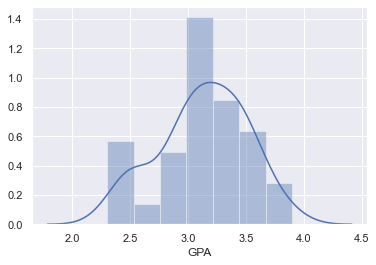

In [100]:
sns.distplot(dff['GPA']);

In [101]:
dff['GPA'].mean()

3.129032258064516

In [103]:
dff['GPA'].median()

3.1500000000000004

In [104]:
dff['GPA'].mode()

0    3.0
1    3.1
2    3.4
dtype: float64

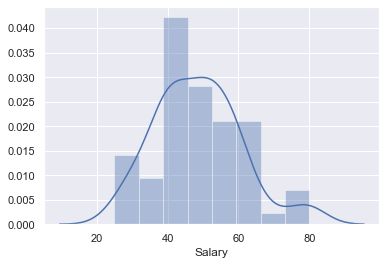

In [105]:
sns.distplot(dff['Salary']);

In [106]:
dff['Salary'].mean()

48.54838709677419

In [107]:
dff['Salary'].median()

50.0

In [108]:
dff['Salary'].mode()

0    40.0
dtype: float64

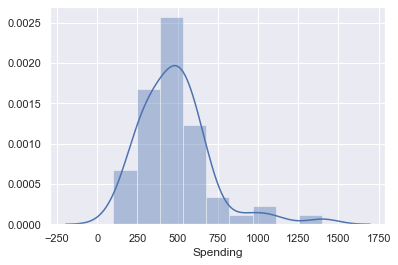

In [109]:
sns.distplot(dff['Spending']);

In [110]:
dff['Spending'].mean()

482.01612903225805

In [111]:
dff['Spending'].median()

500.0

In [112]:
dff['Spending'].mode()

0    500
dtype: int64

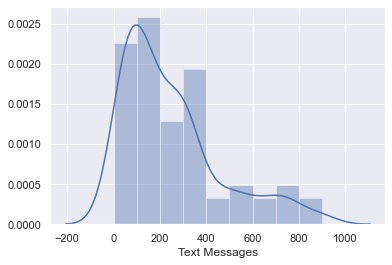

In [113]:
sns.distplot(dff['Text Messages']);

In [114]:
dff['Text Messages'].mean()

246.20967741935485

In [115]:
dff['Text Messages'].median()

200.0

In [116]:
dff['Text Messages'].mode()

0    300
dtype: int64

# The End!!!

# ---------------------------------------------------------------------------------------------------------------

# Analysis of Shingles

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging. In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

This report will show all the analysis help the business to solve its problem.

In [117]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from warnings import filterwarnings
filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import scipy.stats as stats

In [118]:
dfff=pd.read_csv("A+&+B+shingles.csv")

In [119]:
dfff.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [120]:
dfff.tail()

,A,B
31,0.40,nan
32,0.29,nan
33,0.43,nan
34,0.34,nan
35,0.37,nan


In [121]:
print('The number of rows are {} and the columns are {}'.format(dfff.shape[0],dfff.shape[1]))

The number of rows are 36 and the columns are 2


In [123]:
print('The total number of elements of the dataset are: ')
dfff.size

The total number of elements of the dataset are: 


72

In [124]:
dfff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [125]:
dfff.isnull()

,A,B
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [126]:
print(" The missing values are: \n ", dfff.isnull().head(1))

 The missing values are: 
         A      B
0  False  False


In [127]:
dfff.describe()

,A,B
count,36.00,31.00
mean,0.32,0.27
std,0.14,0.14
min,0.13,0.10
25%,0.21,0.16
50%,0.29,0.23
75%,0.39,0.40
max,0.72,0.58


In [128]:
correlation = dfff.corr()
correlation

,A,B
A,1.00,-0.36
B,-0.36,1.00


<AxesSubplot:>

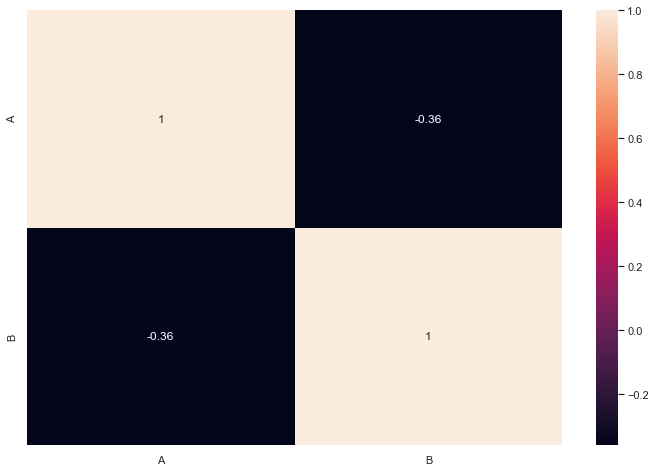

In [129]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot = True)

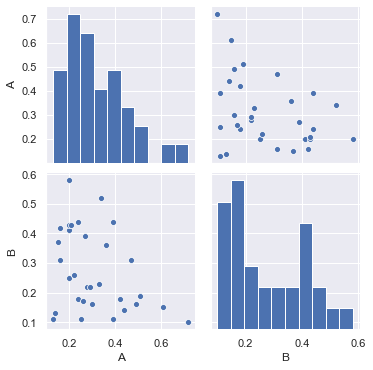

In [130]:
sns.pairplot(dfff[['A','B']])

In [131]:
dfff.describe()

,A,B
count,36.00,31.00
mean,0.32,0.27
std,0.14,0.14
min,0.13,0.10
25%,0.21,0.16
50%,0.29,0.23
75%,0.39,0.40
max,0.72,0.58


In [132]:
dfff.describe(include='all')

,A,B
count,36.00,31.00
mean,0.32,0.27
std,0.14,0.14
min,0.13,0.10
25%,0.21,0.16
50%,0.29,0.23
75%,0.39,0.40
max,0.72,0.58


# Q3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

Solution: H0: The mean moisture content in Shingles is equal to 0.35

H1: company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet.

For A Shingles

In [134]:
tstat,pvalue = stats.ttest_1samp(dfff.A,0.35)

In [135]:
print('One sample t test \n t statistic:{0}, p value{1} '.format(tstat, pvalue/2))

One sample t test 
 t statistic:-1.4735046253382782, p value0.07477633144907513 


For B Shingles

In [136]:
tstat,pvalue = stats.ttest_1samp(dfff.B,0.35,nan_policy='omit')

In [137]:
print('One sample t test \n t statistic:{0}, p value:{1} '.format(tstat, pvalue/2))

One sample t test 
 t statistic:-3.1003313069986995, p value:0.0020904774003191826 


# Q3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

H0: population mean for shingles A and B are equal

H1: population mean for shingles A and B are not equal

a=0.05

To perform Hypothesis Testing, the following assumptions must hold,

The variables must follow continious distribution The sample must be randomly collected from the population The underlying distribution must be normal. Alternatively, if the data is continious, but may not be assumed to follow a normal distribution, a reasonlably large sample size is required. CLT asserts that sample mean follows a normal distribution, even if the population distribution is not normal, when sample size is atleast 30. For 2 sample t-test, the population variances of 2 distributions must be equal.

In [138]:
tstat,pvalue = stats.ttest_ind(dfff['A'],dfff['B'], equal_var = True,nan_policy='omit')

In [139]:
print("tstat={}, pvalue={}".format(round(tstat,3),round(pvalue,3)))

tstat=1.29, pvalue=0.202


# The End!!!